In [2]:
import sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import os
import bigbadbrain as bbb
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
from scipy.ndimage.filters import gaussian_filter
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

from skimage.filters import threshold_triangle
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages')
import os
import statsmodels.api as sm
import cv2
import matplotlib.patches as mpatches
import psutil
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.colors import Normalize


%matplotlib inline
plt.rcParams.update({'font.size': 20})

from sklearn.feature_extraction.image import grid_to_graph
from mpl_toolkits.axes_grid1 import ImageGrid
import json
from matplotlib.ticker import FuncFormatter

import nibabel as nib

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import itertools
import random
from scipy.cluster import hierarchy
import matplotlib as mpl
from matplotlib.pyplot import cm

from scipy.interpolate import UnivariateSpline
from sklearn.linear_model import LinearRegression
import matplotlib.patches as patches

from scipy.fftpack import fft,fftshift,ifft

In [3]:
main_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201221_neural_weighted_behavior/"

In [4]:
response_files = [os.path.join(main_path, file) for file in os.listdir(main_path) if 'responses' in file]
bbb.sort_nicely(response_files)

responses = []
for file in response_files:
    responses.append(np.load(file))
responses = np.asarray(responses)
responses.shape

(49, 2000, 1500)

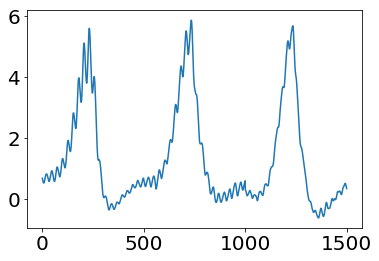

In [5]:
out = np.mean(responses[20,:,:],axis=0)
plt.plot(out)

In [6]:
responses_split = np.reshape(responses, (49,2000,3,500))
responses_fft = fft(responses_split,axis=-1)
responses_fft[:,:,:,15:23] = 0
responses_fft[:,:,:,475:485] = 0
responses_filtered = ifft(responses_fft,axis=-1)
responses_filtered.shape

(49, 2000, 3, 500)

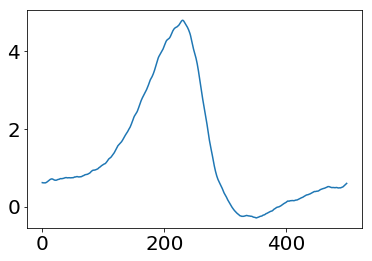

In [7]:
plt.plot(np.mean(responses_filtered[20,:,0,:],axis=0))

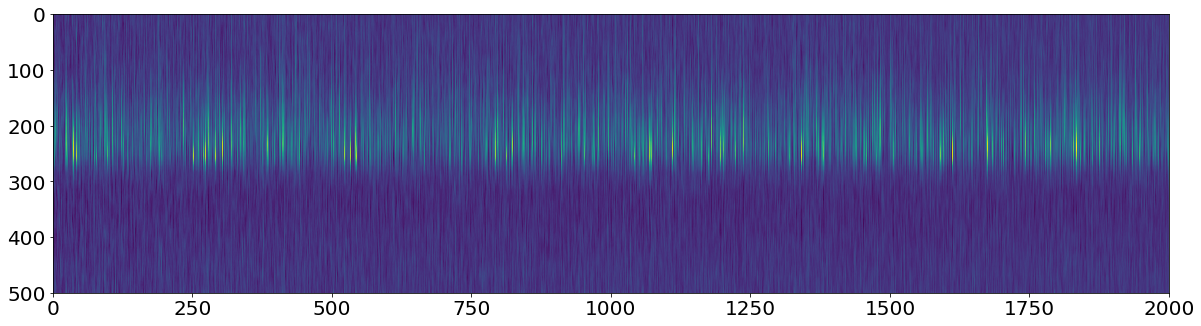

In [8]:
plt.figure(figsize=(20,10))
plt.imshow(responses_filtered[20,:,0,:].real.T)

In [206]:
responses_filtered.shape

(49, 2000, 3, 500)

In [205]:
responses_filtered[20,:,0,:].real.shape

(2000, 500)

In [212]:
all_responses = np.reshape(responses_filtered[:,:,0,:].real,(2000*49,500)).T
all_responses.shape

(500, 98000)

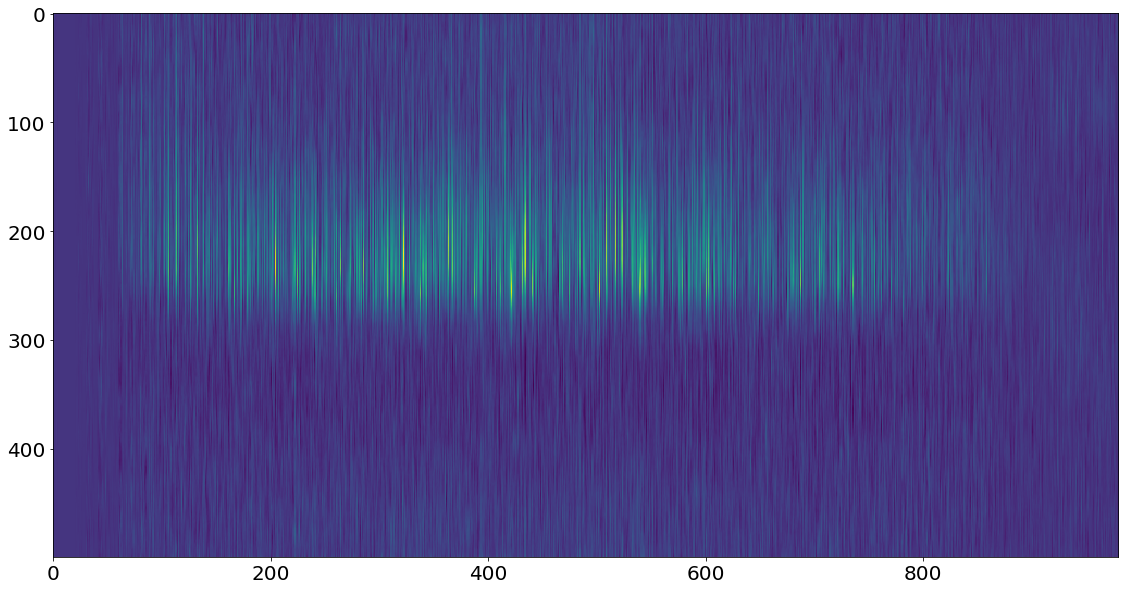

In [214]:
plt.figure(figsize=(20,10))
plt.imshow(all_responses[:,::100])

In [9]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    plt.figure(figsize=(10,10))
    dendrogram(linkage_matrix, **kwargs)

In [162]:
responses_filtered[20,:,0,:].real.shape

(2000, 500)

In [163]:
to_fit = np.reshape(responses_filtered[20,:,:,:].real,(2000,1500))
to_fit.shape

(2000, 1500)

In [165]:
### For dendrogram
clustering_dir = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/main_path"
t0 = time.time()
model = AgglomerativeClustering(distance_threshold=0,
                                n_clusters=None,
                                memory=clustering_dir,
                                linkage='ward')
#model = model.fit(responses_filtered[20,:,0,:].real)
model = model.fit(to_fit)
#model = model.fit(normalized)

print(time.time()-t0)

3.911668062210083


In [166]:
### Create linkage matrix for dendrogram

counts = np.zeros(model.children_.shape[0])
n_samples = len(model.labels_)
for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack([model.children_, model.distances_,
                                  counts]).astype(float)

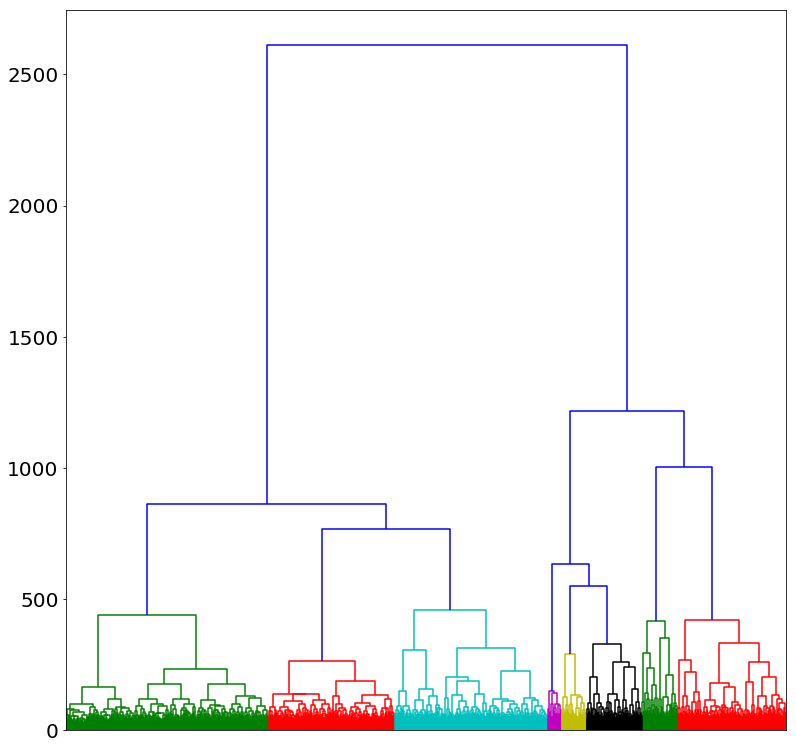

In [169]:
fig = plt.figure(figsize=(10,10))

ax_dendrogram = fig.add_axes([1, 1, 1, 1])
#ax_dendrogram.get_xaxis().set_visible(False)
#ax_dendrogram.get_yaxis().set_visible(False)
test = dendrogram(linkage_matrix,
           truncate_mode=None,
           p=10,
           color_threshold=500,
           #link_color_func=lambda x: colors[x],
           no_labels=True,
           distance_sort=True);

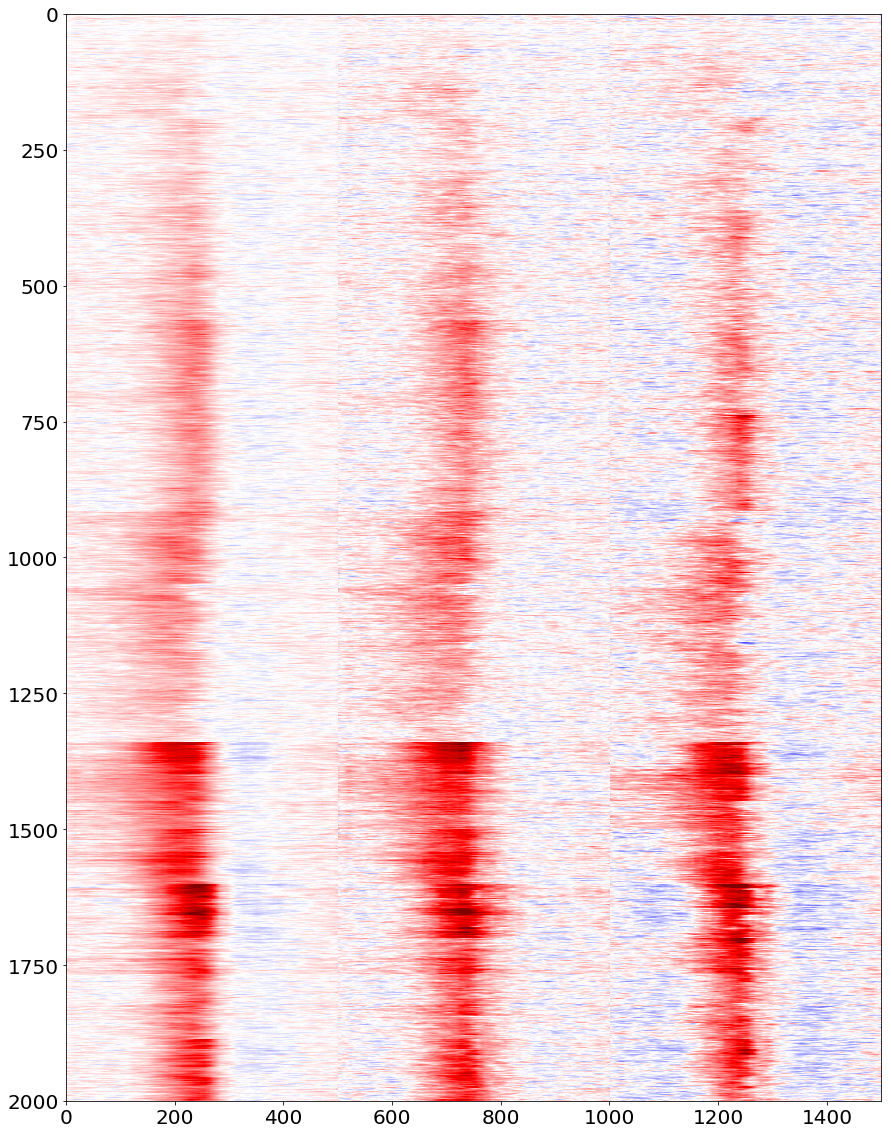

In [182]:
plt.figure(figsize=(20,20))
plt.imshow(to_fit[test['leaves'],:],cmap='seismic',vmin=-20,vmax=20)

#plt.axhline(250,color='k',linestyle='--')
#plt.xlim(0,500)

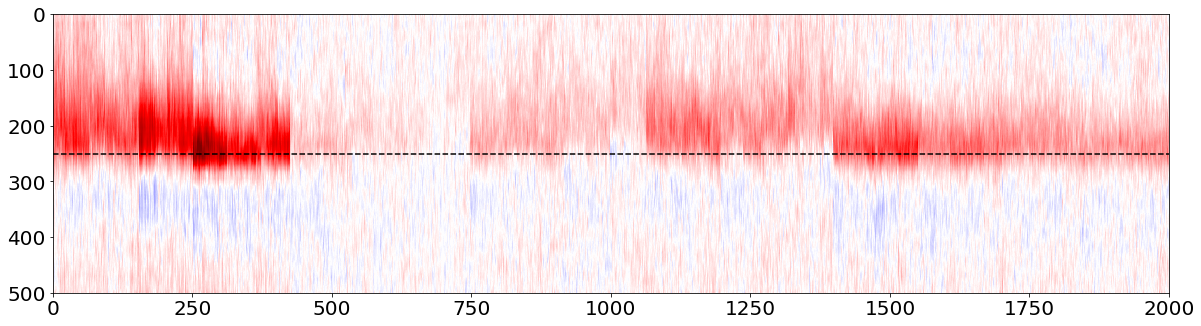

In [159]:
plt.figure(figsize=(20,10))
plt.imshow(responses_filtered[20,test['leaves'],0,:].real.T,cmap='seismic',vmin=-20,vmax=20)
#plt.imshow(normalized[test['leaves'],:].T)

plt.axhline(250,color='k',linestyle='--')
#plt.xlim(0,500)

# visualizing clusters on brain

In [22]:
n_clusters = 2000
z=20
labels_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201129_super_slices/cluster_labels.npy'
cluster_model_labels = np.load(labels_file)
cluster_model_labels = cluster_model_labels[z,:]

0.06380152702331543


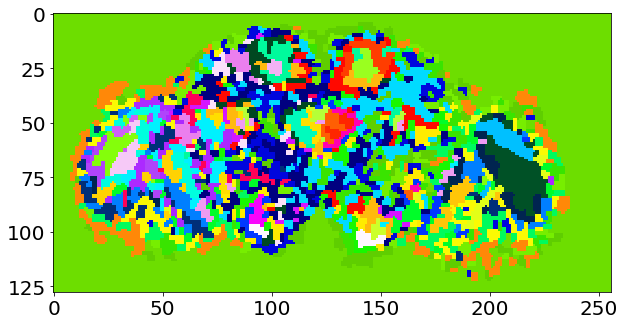

In [175]:
### For dendrogram
clustering_dir = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/main_path"
t0 = time.time()
model = AgglomerativeClustering(
                                n_clusters=50,
                                memory=clustering_dir,
                                linkage='ward')
#model = model.fit(responses_filtered[20,:,0,:].real)
#model = model.fit(normalized)
model = model.fit(to_fit)


print(time.time()-t0)

colored_by_betas = np.zeros((256*128))
for cluster_num in range(n_clusters):
    cluster_indicies = np.where(cluster_model_labels==cluster_num)[0]
    colored_by_betas[cluster_indicies] = model.labels_[cluster_num]
colored_by_betas = colored_by_betas.reshape(256,128)

plt.figure(figsize=(10,10))
plt.imshow(colored_by_betas.T,cmap='gist_ncar')

In [66]:
model.labels_

array([1, 0, 0, ..., 1, 1, 0])

In [67]:
responses_filtered[20,:,0,:].real.shape

(2000, 500)

In [95]:
resps = []
for cluster in range(10):
    cluster_resp = np.mean(responses_filtered[20,np.where(model.labels_==cluster)[0],0,:].real,axis=0)
    resps.append(cluster_resp)
resps = np.asarray(resps)

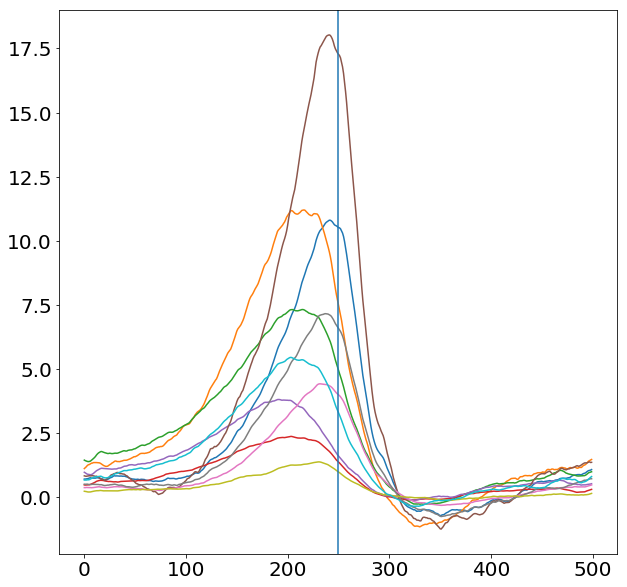

In [96]:
plt.figure(figsize=(10,10))
plt.plot(resps.T);
plt.axvline(250)

In [76]:
np.shape(resps[1])

(500,)

# Testing convolution and deconvolution

In [8]:
cluster_id = np.argmax(np.sum(responses_filtered[20,:,0,:].real, axis=1))

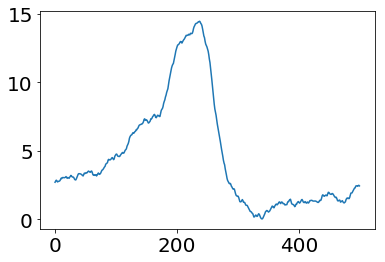

In [9]:
plt.plot(responses_filtered[20,cluster_id,0,:])

In [10]:
impulse_response = responses_filtered[20,cluster_id,0,:].real

In [11]:
class Fly:
    def __init__ (self, fly_name, fly_idx):
        self.dir = os.path.join(dataset_path, fly_name, 'func_0')
        self.fly_idx = fly_idx
        self.fly_name = fly_name
        self.maps = {}
    def load_timestamps (self):
        self.timestamps = bbb.load_timestamps(os.path.join(self.dir, 'imaging'))
    def load_fictrac (self):
        self.fictrac = Fictrac(self.dir, self.timestamps)
    def load_brain_slice (self):
        self.brain = brain[:,:,:,self.fly_idx]
    def load_anatomy (self):
        to_load = os.path.join(dataset_path, self.fly_name, 'warp', 'anat-to-meanbrain.nii')
        self.anatomy = np.array(nib.load(to_load).get_data(), copy=True)
    def load_z_depth_correction (self):
        to_load = os.path.join(dataset_path, self.fly_name, 'warp', '20201220_warped_z_depth.nii')
        self.z_correction = np.array(nib.load(to_load).get_data(), copy=True)
    def get_cluster_averages (self, cluster_model_labels, n_clusters):
        neural_data = self.brain.reshape(-1, 3384)
        signals = []
        self.cluster_indicies = []
        for cluster_num in range(n_clusters):
            cluster_indicies = np.where(cluster_model_labels==cluster_num)[0]
            mean_signal = np.mean(neural_data[cluster_indicies,:], axis=0)
            signals.append(mean_signal)
            self.cluster_indicies.append(cluster_indicies) # store for later
        self.cluster_signals=np.asarray(signals)
    def get_cluster_id (self, x, y):
        ax_vec = x*128 + y
        for i in range(n_clusters):
            if ax_vec in self.cluster_indicies[i]:
                cluster_id = i
                break
        return cluster_id

class Fictrac:
    def __init__ (self, fly_dir, timestamps):
        self.fictrac_raw = bbb.load_fictrac(os.path.join(fly_dir, 'fictrac'))
        self.timestamps = timestamps
    def make_interp_object(self, behavior):
        # Create camera timepoints
        fps=50
        camera_rate = 1/fps * 1000 # camera frame rate in ms
        expt_len = 1000*30*60
        x_original = np.arange(0,expt_len,camera_rate)

        # Smooth raw fictrac data
        fictrac_smoothed = scipy.signal.savgol_filter(np.asarray(self.fictrac_raw[behavior]),25,3)

        # Create interp object with camera timepoints
        fictrac_interp_object = interp1d(x_original, fictrac_smoothed, bounds_error = False)
        return fictrac_interp_object

    def pull_from_interp_object(self, interp_object, timepoints):
        new_interp = interp_object(timepoints)
        np.nan_to_num(new_interp, copy=False);
        return new_interp

    def interp_fictrac(self, z):
        behaviors = ['dRotLabY', 'dRotLabZ']; shorts = ['Y', 'Z']
        self.fictrac = {}

        for behavior, short in zip(behaviors, shorts):
            interp_object = self.make_interp_object(behavior)
            self.fictrac[short + 'i'] = interp_object

            ### Velocity ###
            low_res_behavior = self.pull_from_interp_object(interp_object, self.timestamps[:,z])
            self.fictrac[short] = low_res_behavior#/np.std(low_res_behavior)

            ### Clipped Velocities ###
            self.fictrac[short + '_pos'] = np.clip(self.fictrac[short], a_min=0, a_max=None)
            self.fictrac[short + '_neg'] = np.clip(self.fictrac[short], a_min=None, a_max=0)*-1

            ### Strongly Clipped Velocities ###
            # excludes points even close to 0
            #self.fictrac[short + '_pos_very'] = np.clip(self.fictrac[short], a_min=0.3, a_max=None)
            #self.fictrac[short + '_neg_very'] = np.clip(self.fictrac[short], a_min=None, a_max=-0.3)*-1

            ### Acceleration ###
            high_res_behavior = self.pull_from_interp_object(interp_object, high_res_timepoints)
            self.fictrac[short + 'h'] = high_res_behavior/np.std(high_res_behavior)

            accel = scipy.signal.savgol_filter(np.diff(high_res_behavior),25,3)
            accel = np.append(accel, 0)
            interp_object = interp1d(high_res_timepoints, accel, bounds_error = False)
            acl = interp_object(self.timestamps[:,z])
            acl[-1] = 0
            self.fictrac[short + 'a'] = acl#/np.std(acl)

            ### Clipped Acceleration ###
            self.fictrac[short + 'a' + '_pos'] = np.clip(self.fictrac[short + 'a'], a_min=0, a_max=None)
            self.fictrac[short + 'a' + '_neg'] = np.clip(self.fictrac[short + 'a'], a_min=None, a_max=0)*-1

        self.fictrac['YZ'] = np.sqrt(np.power(self.fictrac['Y'],2), np.power(self.fictrac['Z'],2))
        self.fictrac['YZh'] = np.sqrt(np.power(self.fictrac['Yh'],2), np.power(self.fictrac['Zh'],2))

In [12]:
brain_file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201129_super_slices/superslice_{}.nii".format(20) #<---------- !!!
brain = np.array(nib.load(brain_file).get_data(), copy=True)

In [13]:
expt_len = 1000*30*60
resolution = 10
high_res_timepoints = np.arange(0,expt_len,resolution) #0 to last time at subsample res
dataset_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset"
fly_names = ['fly_094']
z=20

In [14]:
n_clusters = 2000
labels_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201129_super_slices/cluster_labels.npy'
cluster_model_labels = np.load(labels_file)
cluster_model_labels = cluster_model_labels[z,:]

In [15]:
flies = {}
for i, fly in enumerate(fly_names):
    flies[fly] = Fly(fly_name=fly, fly_idx=2)
    flies[fly].load_timestamps()
    flies[fly].load_fictrac()
    flies[fly].fictrac.interp_fictrac(z)
    flies[fly].load_brain_slice()
    flies[fly].load_z_depth_correction()
    flies[fly].get_cluster_averages(cluster_model_labels, n_clusters)


~~ load_timestamps ~~
Trying to load timestamp data from hdf5 file.
Success.
load_timestamps done. Duration: 55.41 ms

~~ load_fictrac ~~
load_fictrac done. Duration: 3.03 sec


In [16]:
flies['fly_094'].cluster_signals.shape

(2000, 3384)

In [17]:
cluster_signal = flies['fly_094'].cluster_signals[cluster_id,:]
behavior = flies['fly_094'].fictrac.fictrac['Y']

In [18]:
scipy.stats.pearsonr(cluster_signal, behavior)[0]

0.1285030006105005

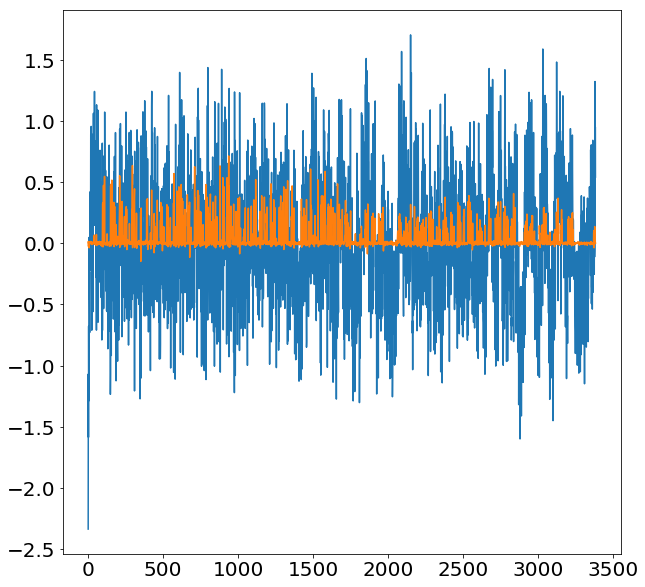

In [19]:
plt.figure(figsize=(10,10))
plt.plot(flies['fly_094'].cluster_signals[cluster_id,:])
plt.plot(flies['fly_094'].fictrac.fictrac['Y']*10)

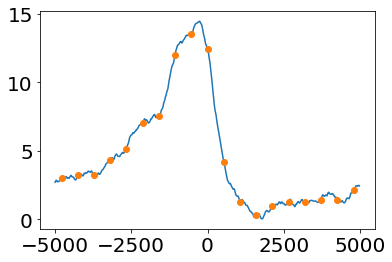

In [22]:
# resample impulse response
time_shifts = list(range(-5000,5000,20)) # in ms
imaging_period = 532
max_samples = int(np.floor(5000/532))
imaging_resamples = list(range(imaging_period*-max_samples,imaging_period*(max_samples+1),imaging_period))
impulse_interp_obj = interp1d(time_shifts, impulse_response, bounds_error = False)
filter_resampled = impulse_interp_obj(imaging_resamples)
plt.plot(time_shifts, impulse_response)
plt.plot(imaging_resamples, filter_resampled,'o')

In [76]:
#############################
### Build Toeplitz Matrix ###
#############################

toe_vector = np.zeros(3384)
toe_vector[:len(filter_resampled)] = filter_resampled[::-1] # flip filter

toe_matrix = np.zeros((3384,3384))
for i in range(3384):
    toe_matrix[i,:] = toe_vector
    toe_vector = np.roll(toe_vector,1)

toe_matrix = np.roll(toe_matrix,9,axis=0)
toe_matrix = toe_matrix.T
toe_matrix.shape

(3384, 3384)

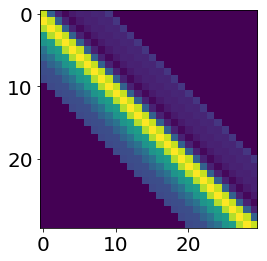

In [48]:
plt.imshow(toe_matrix[:30,:30],vmin=0)

In [77]:
predicted_neural_response = np.matmul(toe_matrix,behavior)

In [37]:
neural_deconvolved = np.linalg.lstsq(toe_matrix.T, cluster_signal)[0]

(2000, 2400)

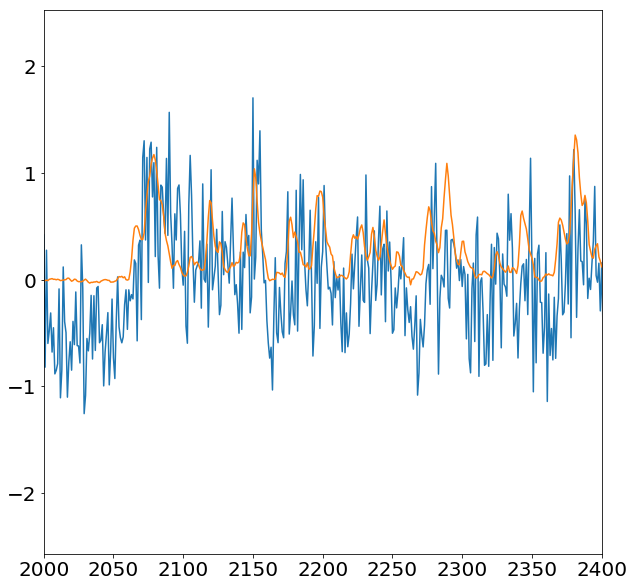

In [79]:
plt.figure(figsize=(10,10))
plt.plot(cluster_signal)
#plt.plot(neural_deconvolved)
plt.plot(predicted_neural_response)
#plt.plot(behavior*30)
plt.xlim(2000,2400)

In [62]:
scipy.stats.pearsonr(neural_deconvolved, cluster_signal)[0]

0.12674004818343212

In [69]:
scipy.stats.pearsonr(cluster_signal, predicted_neural_response)[0]

0.27332041791987394

In [70]:
scipy.stats.pearsonr(cluster_signal, behavior)[0]

0.1285030006105005

In [19]:
responses_filtered = np.reshape(responses_filtered,(49,2000,1500))

In [25]:
all_z = []
for z in range(49):
    colored_by_betas = np.zeros((256*128,1500))
    for cluster_num in range(n_clusters):
        cluster_indicies = np.where(cluster_model_labels[z,:]==cluster_num)[0]
        colored_by_betas[cluster_indicies,:] = responses_filtered[z,cluster_num,:]
    colored_by_betas = colored_by_betas.reshape(256,128,1500)
    all_z.append(colored_by_betas)
all_z = np.asarray(all_z)

In [26]:
all_z = np.swapaxes(all_z,1,2)
all_z.shape

(49, 128, 256, 1500)

In [27]:
flat_z = np.zeros((128*7,256*7,1500))

for z in range(49):
    x_start = z%7
    x_start = x_start * 256
    x_end = x_start + 256

    y_start = int(z/7)
    y_start = y_start * 128
    y_end = y_start + 128
    
    flat_z[y_start:y_end,x_start:x_end,:] = all_z[z,:,:,:]

In [29]:
save_file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201221_neural_weighted_behavior/flat_fiji_corrected"
nib.Nifti1Image(flat_z, np.eye(4)).to_filename(save_file)

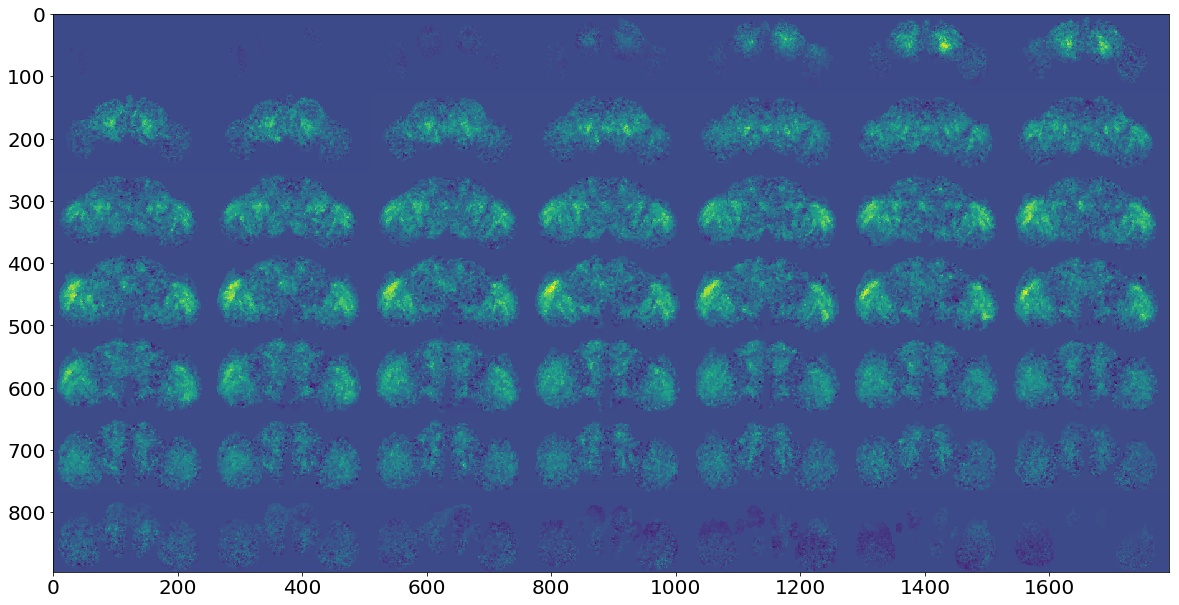

In [28]:
plt.figure(figsize=(20,20))
plt.imshow(flat_z[:,:,650])

In [32]:
all_z.shape

(49, 128, 256, 1500)

In [39]:
out = np.max(all_z,axis=0)

In [36]:
out.shape

(128, 256, 1500)

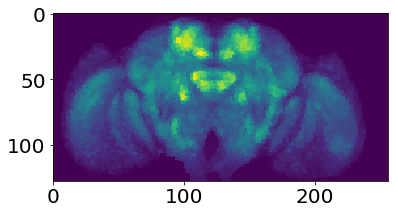

In [37]:
plt.imshow(out[:,:,250])

In [44]:
out = np.max(all_z,axis=0)
out = np.swapaxes(out,0,1)
out = out[:,:,500:1000]
out = out[:,:,::-1]
out.shape

(256, 128, 500)

In [45]:
save_file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201221_neural_weighted_behavior/20201223_turn"
nib.Nifti1Image(out, np.eye(4)).to_filename(save_file)